In [13]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv('/content/Credit Risk Benchmark Dataset.csv')
df.head()

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38,0,0.302150,5440,4,0,1,0,3,0
1,0.704592,63,0,0.471441,8000,9,0,1,0,0,0
2,0.063113,57,0,0.068586,5000,17,0,0,0,0,0
3,0.368397,68,0,0.296273,6250,16,0,2,0,0,0
4,1.000000,34,1,0.000000,3500,0,0,0,0,1,0


In [14]:
# Assuming 'predict' is the target variable
X = df[['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'open_credit', 'late_90', 'real_estate', 'late_60_89', 'dependents']]
y = df['dlq_2yrs']

In [15]:
# Handle missing values (replace with mean for numerical features)
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        X[col].fillna(X[col].mean(), inplace=True)

<ipython-input-15-413c7dcc32be>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
<ipython-input-15-413c7dcc32be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mean(), inplace=True)


In [16]:
# Convert to numerical features (if necessary)
X = pd.get_dummies(X, columns=['dependents'], dummy_na=True) # Example: One-hot encode 'dependents'
# ... handle other categorical features as needed

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression()  # Or any suitable model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7262937481304218


In [21]:
# Model Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.67      0.89      0.76      1671
           1       0.83      0.56      0.67      1672

    accuracy                           0.73      3343
   macro avg       0.75      0.73      0.72      3343
weighted avg       0.75      0.73      0.72      3343

ROC AUC Score: 0.8114886939889303


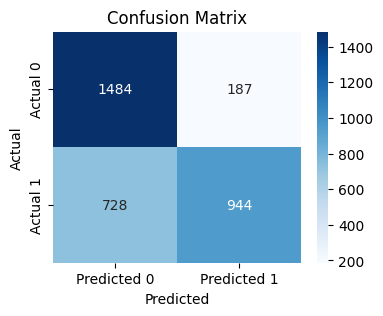

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

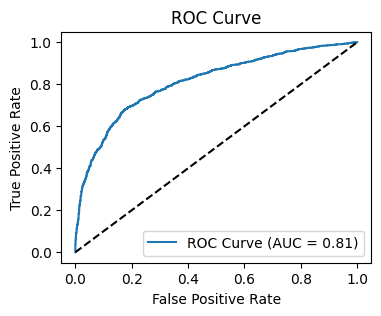

In [25]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()